### Pair II
# Preprocesado

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------
pd.options.display.max_columns = None

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Set2", 20)

Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:
- Estandarizar las variables numéricas de vuestro set de datos
- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.
- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.
- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [2]:
df = pd.read_pickle("../data/Invistico_Airline_limpio_outliers_gestionados.pkl")
df.sample(2)

,satisfaccion,genero,cliente,edad,viaje,clase,distancia,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,retraso_salida
12497,insatisfecho,hombre,cliente leal,25,viaje personal,Eco Plus,1929,2,4,2,1,2,2,2,2,4,5,2,2,5,2,0
10752,satisfecho,mujer,cliente leal,43,viaje personal,Eco,1475,5,5,5,5,4,5,4,4,4,4,4,5,4,4,0


```Estandarización```

In [3]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,edad,distancia,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,retraso_salida
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,60,623,0,0,0,3,3,4,3,1,4,0,1,4,1,3,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0


In [4]:
df_num = df[["edad", "distancia", "retraso_salida"]]
df_num

,edad,distancia,retraso_salida
0,65,265,0
1,47,2464,0
2,15,2138,0
3,60,623,0
4,70,354,0
...,...,...,...
129875,29,1731,0
129876,63,2087,0
129877,69,2320,0
129878,66,2450,0


In [5]:
scaler = StandardScaler()

In [6]:
# ahora ya podemos ajustar nuestros datos.  

scaler.fit(df_num)

# transformamos los datos

X_escaladas = scaler.transform(df_num)

numericas_estandar = pd.DataFrame(X_escaladas, columns = df_num.columns)
numericas_estandar.head(2)

,edad,distancia,retraso_salida
0,1.691351,-1.769313,-0.479852
1,0.500820,0.578523,-0.479852


In [7]:
df.drop(["edad", "distancia", "retraso_salida"], axis = 1, inplace= True)

In [8]:
# Unimos los df

df = pd.concat([df, numericas_estandar], axis = 1)
df.head()

,satisfaccion,genero,cliente,viaje,clase,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,edad,distancia,retraso_salida
0,satisfecho,mujer,cliente leal,viaje personal,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,1.691351,-1.769313,-0.479852
1,satisfecho,hombre,cliente leal,viaje personal,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0.500820,0.578523,-0.479852
2,satisfecho,mujer,cliente leal,viaje personal,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,-1.615680,0.230458,-0.479852
3,satisfecho,mujer,cliente leal,viaje personal,Eco,0,0,0,3,3,4,3,1,4,0,1,4,1,3,1.360648,-1.387082,-0.479852
4,satisfecho,mujer,cliente leal,viaje personal,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,2.022054,-1.674289,-0.479852


In [9]:
df["clase"].unique()

['Eco', 'Business', 'Eco Plus']
Categories (3, object): ['Business', 'Eco', 'Eco Plus']

```Codificación con datos estandarizados```

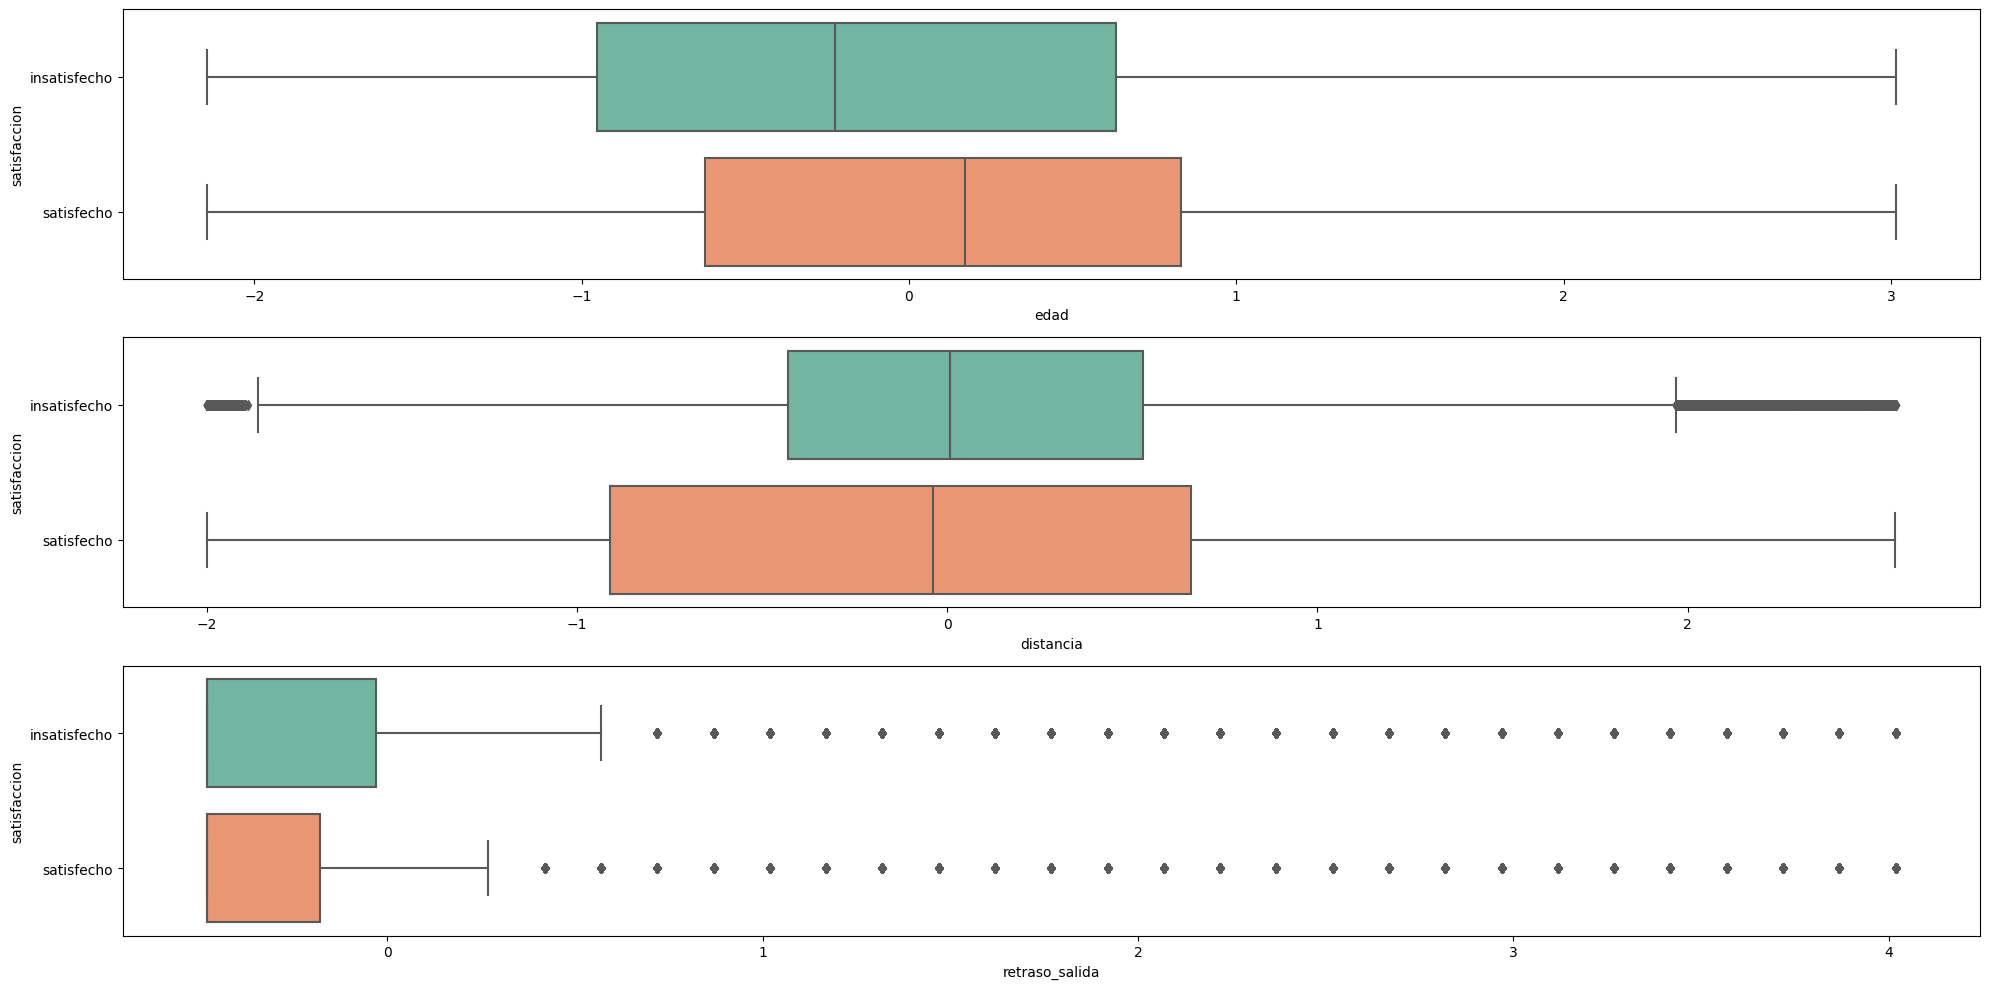

In [10]:

fig, axes = plt.subplots(3, 1, figsize=(20, 10))
axes = axes.flat

for indice, columna in enumerate(numericas_estandar):
    sns.boxplot(x = df[columna], y = df["satisfaccion"], data = df, ax=axes[indice], palette = qualitative_colors);
plt.tight_layout()
#fig.delaxes(axes[-1])
plt.savefig("../graficas/02_prepro_boxplot.png")
plt.show()

Comprobamos con la gráfica boxplot que sí tienen orden.

```Codificación con datos sin estandarizar```

In [11]:
# encoding de categóricas con orden

map_satisfaccion = {"satisfecho": 1, "insatisfecho": 0}
map_genero = {"hombre": 0, "mujer":1}
map_cliente = {"cliente leal": 0, "cliente desleal": 1}
map_viaje = {"viaje personal": 0, "viaje de negocios": 1}
map_clase = {"Eco": 0, "Business": 1, "Eco Plus": 2}


df["satisfaccion"] = df["satisfaccion"].map(map_satisfaccion)
df["genero"] = df["genero"].map(map_genero)
df["cliente"] = df["cliente"].map(map_cliente)
df["viaje"] = df["viaje"].map(map_viaje)
df["clase"] = df["clase"].map(map_clase)

```Desbalanceo usando imblearn (SMOTE)```

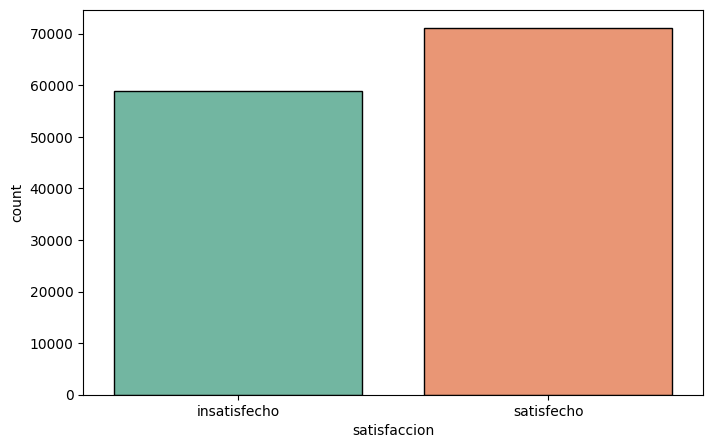

In [12]:

# recordamos como están distribuidos los datos de vr

plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df, x = "satisfaccion",  palette= qualitative_colors,  edgecolor='black')
fig1.set(xticklabels=["insatisfecho", "satisfecho"]) 
plt.show();

In [13]:
# lo primero que hacemos es sacar el número de registros que tenemos para la clase minoritaria
num_minoritarios = df["satisfaccion"].value_counts()[1]
num_minoritarios

71087

In [14]:
# para aplicar este método lo primero que tenemos que hacer es separar en X e y y en train y test como aprendimos en la lecciones de regresion lineal
y = df['satisfaccion']
X = df.drop('satisfaccion', axis=1)


#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [15]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [16]:
y_train.value_counts()

satisfaccion
1    49873
0    41043
Name: count, dtype: int64

In [17]:
y_train_res.value_counts()

satisfaccion
0    48986
1    48986
Name: count, dtype: int64

In [18]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Satisfacción antes del ajuste \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Satisfacción antes del ajuste 
 satisfaccion
1    49873
0    41043
Name: count, dtype: int64
..............................................................
Distribución después del ajuste 
 satisfaccion
0    48986
1    48986
Name: count, dtype: int64


In [19]:
df.to_pickle("../data/preprocesado.pkl")